# Quantium Data Analytics #

#### Analysis of Customer Segments and Chip purchasing behaviour


Importing the necessary Libraries

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data in the Pandas DataFrame

In [374]:
transaction_data=pd.read_csv('QVI_transaction_data.csv')
purchase_behaviour_data=pd.read_csv('QVI_purchase_behaviour.csv')

Now lets understand the both datasets and see the summaries of them

In [375]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [376]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Observation:
The transaction dataset contains 264836 rows, and it have got 7 featues.
The only problem that seems to be in this dataset is that the format of Date is incorrect. (In should be in date format, but it is in integer format)

Converting Date from Integer to date format

In [377]:
# The value in the date column seems like excel serial date numbers where the dates are stored as the numbers of days since december 30,1899.
transaction_data['DATE']=pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [378]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [379]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [380]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


---

In [381]:
purchase_behaviour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [382]:
purchase_behaviour_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Observation:
Purchase behaviour data have got 3 features and just 72637 data rows. Here all the features seems to be in the correct format.

---

Now first lets focus on the Transaction_data

Product Name

In [383]:
transaction_data['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [384]:
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Here we can notice that this dataset is entirely not about chips, as we can see some SALSA's around as well. Here as we are only dealing with chips, anything that mentions salsa is removed.

In [385]:
transaction_data['SALSA']=transaction_data['PROD_NAME'].str.lower().str.contains('salsa', na=False)
transaction_data['SALSA'].sum()

np.int64(18094)

In [386]:
ss=len(transaction_data['PROD_NAME'])
ss

264836

Among the 264836 rows of the PROD_NAME 18094 were SALSA, so we are going to remove it.

In [387]:
transaction_data=transaction_data[transaction_data['SALSA']==False].copy()
transaction_data=transaction_data.drop('SALSA',axis=1)

In [388]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


The new number of rows is 246742.

In [389]:
transaction_data['PROD_NAME'].describe()

count                                     246742
unique                                       105
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [390]:
top_product=transaction_data['PROD_NAME'].value_counts().index[0]

In [391]:
top_product

'Kettle Mozzarella   Basil & Pesto 175g'

Hence, from the summary of the Product Name of the Transaction Data, we found out that among 246742 data, there are only 105 unique product names
and among them the product with the top frequency of 3304 is Kettle Mozzarella Basil & Pesto 175g

Here we noticed that the product name have got certain special signs and numbers.
We don't require those hence we are going to remove them

But let's just store the sizes in another name, as it might carry some significance in the future.

Before doing that lets check whether there is a product or not that ends with the unit like g

In [392]:
not_ending_with_g=~transaction_data['PROD_NAME'].str.endswith('g')

In [393]:
transaction_data[not_ending_with_g]['PROD_NAME'].unique()

array(['Grain Waves Sour    Cream&Chives 210G',
       'Red Rock Deli Sp    Salt & Truffle 150G',
       'Smiths Thinly       Swt Chli&S/Cream175G',
       'Kettle 135g Swt Pot Sea Salt'], dtype=object)

So basically there are 4 products that doesnot end with g, among them three ends with G and the salt one have the size in the middle, that makes things interesting.

In [394]:
transaction_data['SIZES']=transaction_data['PROD_NAME'].str.extract(r'(\d+(?:\.\d+)?\s*(?i:g|kg|ml|l|oz))')

In [395]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [396]:
transaction_data['SIZES']=transaction_data['SIZES'].copy()

---

---

EXCEPTION CASE HANDLING

In [397]:
transaction_data[transaction_data['PROD_NAME']=='Kettle 135g Swt Pot Sea Salt']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
65,2019-05-20,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
153,2019-05-17,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,135g
174,2018-08-20,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
177,2019-05-17,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,135g
348,2018-10-26,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
...,...,...,...,...,...,...,...,...,...
264564,2018-10-08,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
264574,2019-06-12,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
264725,2018-07-20,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,135g
264767,2019-06-08,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g


In [398]:
transaction_data[transaction_data['PROD_NAME']=='Smiths Thinly       Swt Chli&S/Cream175G']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
35,2018-08-19,51,51100,46803,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,175G
421,2018-08-07,13,13010,11152,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G
428,2019-06-25,13,13010,11159,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G
527,2018-08-25,20,20329,17313,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,175G
879,2018-07-13,45,45126,41112,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G
...,...,...,...,...,...,...,...,...,...
263054,2019-04-25,195,195320,195230,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,175G
263310,2019-03-17,205,205252,204325,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G
263317,2018-07-01,205,205430,204503,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,175G
263429,2019-03-03,213,213088,212425,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G


Handling of this two case proves that our code to extract the sizes from the Product Name is accurate and effective.

---

---

Now we can remove this from the product name

In [399]:
transaction_data['PROD_NAME']=transaction_data['PROD_NAME'].str.replace(r'\d+(?:\.\d+)?\s*(?i:g|k|ml|lb|oz)\b','',regex=True)
transaction_data['PROD_NAME']=transaction_data['PROD_NAME'].str.strip()

In [400]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150g


---

---

Exception Case Handling

In [401]:
transaction_data[transaction_data['PROD_NBR']==37]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
35,2018-08-19,51,51100,46803,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,175G
421,2018-08-07,13,13010,11152,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G
428,2019-06-25,13,13010,11159,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G
527,2018-08-25,20,20329,17313,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,175G
879,2018-07-13,45,45126,41112,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G
...,...,...,...,...,...,...,...,...,...
263054,2019-04-25,195,195320,195230,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,175G
263310,2019-03-17,205,205252,204325,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G
263317,2018-07-01,205,205430,204503,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,175G
263429,2019-03-03,213,213088,212425,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G


In [402]:
transaction_data[transaction_data['PROD_NBR']==63]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
65,2019-05-20,83,83008,82099,63,Kettle Swt Pot Sea Salt,2,8.4,135g
153,2019-05-17,208,208139,206906,63,Kettle Swt Pot Sea Salt,1,4.2,135g
174,2018-08-20,237,237227,241132,63,Kettle Swt Pot Sea Salt,2,8.4,135g
177,2019-05-17,243,243070,246706,63,Kettle Swt Pot Sea Salt,1,4.2,135g
348,2018-10-26,7,7077,6604,63,Kettle Swt Pot Sea Salt,2,8.4,135g
...,...,...,...,...,...,...,...,...,...
264564,2018-10-08,260,260240,259480,63,Kettle Swt Pot Sea Salt,2,8.4,135g
264574,2019-06-12,261,261035,259860,63,Kettle Swt Pot Sea Salt,2,8.4,135g
264725,2018-07-20,266,266413,264246,63,Kettle Swt Pot Sea Salt,1,4.2,135g
264767,2019-06-08,269,269133,265839,63,Kettle Swt Pot Sea Salt,2,8.4,135g


This illustrates that even in deleting the sizes from the product Name my code block is working accurately.

---

---

### Sorting Product by Frequency

In [403]:
frequency_map=transaction_data['PROD_NAME'].value_counts()
frequency_map

PROD_NAME
Kettle Mozzarella   Basil & Pesto       3304
Kettle Tortilla ChpsHny&Jlpno Chili     3296
Cobs Popd Swt/Chlli &Sr/Cream Chips     3269
Tyrrells Crisps     Ched & Chives       3268
Cobs Popd Sea Salt  Chips               3265
                                        ... 
Sunbites Whlegrn    Crisps Frch/Onin    1432
RRD Pc Sea Salt                         1431
NCC Sour Cream &    Garden Chives       1419
French Fries Potato Chips               1418
WW Crinkle Cut      Original            1410
Name: count, Length: 105, dtype: int64

In [404]:
transaction_data['PROD_freq']=transaction_data['PROD_NAME'].map(frequency_map)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g,1468
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g,1498
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g,1484
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175g,1473
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150g,3296


In [405]:
transaction_data_sorted=transaction_data.sort_values('PROD_freq', ascending=False)
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175g,3304
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304


In [406]:
transaction_data_sorted.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
168217,2019-04-20,225,225142,225521,72,WW Crinkle Cut Original,2,3.4,175g,1410
76369,2019-03-26,160,160161,161150,72,WW Crinkle Cut Original,2,3.4,175g,1410
230584,2018-11-14,53,53110,47364,72,WW Crinkle Cut Original,1,1.7,175g,1410
65016,2019-04-20,178,178228,178998,72,WW Crinkle Cut Original,2,3.4,175g,1410
68668,2019-06-03,259,259013,257496,72,WW Crinkle Cut Original,2,3.4,175g,1410


In [407]:
transaction_data_sorted.drop('PROD_freq', axis=1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175g
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g
...,...,...,...,...,...,...,...,...,...
168217,2019-04-20,225,225142,225521,72,WW Crinkle Cut Original,2,3.4,175g
76369,2019-03-26,160,160161,161150,72,WW Crinkle Cut Original,2,3.4,175g
230584,2018-11-14,53,53110,47364,72,WW Crinkle Cut Original,1,1.7,175g
65016,2019-04-20,178,178228,178998,72,WW Crinkle Cut Original,2,3.4,175g


transaction_data_sorted is our new data frame with product name and other values sorted in the order of highest frequency to the lowest frequency

---

### SORTED DATA SUMMARY, STATISTICS

In [408]:
transaction_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 137549 to 68668
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
 8   SIZES           246742 non-null  object        
 9   PROD_freq       246742 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.7+ MB


In [409]:
transaction_data_sorted.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_freq
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,2651.619359
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1410.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,1516.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,3134.000000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,3174.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,3304.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,777.492767


#### Observation
1. None of the dataset have any null values
2. We don't have std of Date as it doesnot make sense.
3. In product quantity we are observing a maximum quantity of 200, that seems uncommon for chips.

In [410]:
transaction_data_sorted[transaction_data_sorted['PROD_QTY']==200.00]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380g,3185
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380g,3185


So there were two ocassions where the maximum product quanity of 200 was sold.
In both the cases it was the DORITO CORN CHP SUPREME.

Interesting fact about it is , the LYLTY_CARD_NUMBER is the SAME and it was bought on the SAME STORE, hence both the product was bought by the same customers. So let's check if the customer has had other transaction or not.

In [411]:
transaction_data_sorted[transaction_data_sorted['LYLTY_CARD_NBR']== 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380g,3185
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380g,3185


No, this customer have made only these two purchase, which is the maximum purchase and they don't have purchased anything else. It seems like they are not any ordinary retail customers 
and are buying chips for like a wholesale purpose, hence we will remove this loyalty card number from further analysis.

In [412]:
transaction_data_sorted=transaction_data_sorted[transaction_data_sorted['LYLTY_CARD_NBR']!= 226000].copy()

In [413]:
transaction_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 137549 to 68668
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   SIZES           246740 non-null  object        
 9   PROD_freq       246740 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.7+ MB


Now the two row with max purchase amount is removed.
Now lets check the summary statistics again.

In [414]:
transaction_data_sorted.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_freq
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569600,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,2651.615036
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1410.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,1516.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,3134.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,3174.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,3304.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,777.494435


Hence the max product quantity is now 5, which seems reasonable.

---

### Lets groupby the number of transaction by date

In [415]:
transaction_by_date=transaction_data_sorted.groupby('DATE').size()
transaction_by_date

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64

In [416]:
existing_dates=transaction_data_sorted['DATE'].sort_values().unique()

In [417]:
full_range=pd.date_range(start='2018-07-01',end='2019-06-30')

In [418]:
missing_dates=full_range.difference(existing_dates)
missing_dates

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

Here we can see that the data of 2018 December 25, which is Christmas day is missing.

In [419]:
transaction_by_date=transaction_by_date.reset_index()
transaction_by_date.columns=['DATE','COUNTS']

In [420]:
transaction_by_date

,DATE,COUNTS
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [421]:
transaction_by_date=transaction_by_date.set_index('DATE').reindex(full_range,fill_value=0)
transaction_by_date=transaction_by_date.reset_index()
transaction_by_date.columns=['DATE','COUNTS']



In [422]:
transaction_by_date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    365 non-null    datetime64[ns]
 1   COUNTS  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


---

LET's PLOT Number of transaction by date

In [423]:
import plotly.express as px


In [424]:
fig=px.line(transaction_by_date, x='DATE', y='COUNTS')

fig.update_layout(title='Transactions Over Time',yaxis_title='Number of Transactions',xaxis=dict(dtick="M1", tickformat="%b %Y"),hovermode='x unified')
fig.add_annotation(
    x='2018-12-25',
    y=0,
    text="No sales on Christmas Day",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="red",
    ax=50,
    ay=-40,
    bgcolor="white",
    bordercolor="red",
    borderwidth=2
)
fig.show()


The steep drop observed here is the data of christmas day, where the store was closed and there were no sales.

---

### SIZES

In [425]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175g,3304
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304


In [426]:
transaction_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 137549 to 68668
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   SIZES           246740 non-null  object        
 9   PROD_freq       246740 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.7+ MB


Here we can see that the sizes is an object so lets make gm a standard size and convert every value to g and convert the feature into a integer

In [427]:
transaction_data_sorted[['SIZE_VALUES','SIZE_UNIT']]=transaction_data_sorted['SIZES'].str.extract(r'(\d+(?:\.\d+)?)\s*([a-zA-Z]+)')
transaction_data_sorted['SIZE_VALUES']=pd.to_numeric(transaction_data_sorted['SIZE_VALUES'])
transaction_data_sorted['SIZE_UNIT']=transaction_data_sorted['SIZE_UNIT']

In [428]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq,SIZE_VALUES,SIZE_UNIT
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304,175,g
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304,175,g
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304,175,g
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175g,3304,175,g
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304,175,g


In [429]:
transaction_data_sorted['SIZE_UNIT'].unique()

array(['g', 'G'], dtype=object)

Here we see that all units are in Grams hence its remove the size UNIT and modify the title of the SIZE_VALUES

In [430]:
transaction_data_sorted=transaction_data_sorted.drop(columns=['SIZE_UNIT','SIZES'], axis=1)

In [431]:
transaction_data_sorted=transaction_data_sorted.rename(columns={'SIZE_VALUES':'SIZE_VALUES(GRAM)'})

In [432]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_freq,SIZE_VALUES(GRAM)
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,3304,175
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175


In [433]:
transaction_data_sorted['SIZE_VALUES(GRAM)'].max()

np.int64(380)

In [434]:
transaction_data_sorted['SIZE_VALUES(GRAM)'].min()

np.int64(70)

The maximum size of the packet is 380 gram and the minimum size of the packet is 70 gram.

##### VISUALIZING THE NUMBER OF TRANSACTION BY PACKET SIZE

In [435]:
transaction_by_sizes=transaction_data_sorted.groupby('SIZE_VALUES(GRAM)').size()

In [436]:
transaction_by_sizes.head()


SIZE_VALUES(GRAM)
70      1507
90      3008
110    22387
125     1454
134    25102
dtype: int64

In [437]:
transaction_by_sizes=transaction_by_sizes.reset_index()
transaction_by_sizes.columns=['SIZES','TRANSACTION']

In [438]:
transaction_by_sizes.tail()

,SIZES,TRANSACTION
15,220,1564
16,250,3169
17,270,6285
18,330,12540
19,380,6416


In [439]:
transaction_by_sizes['SIZES'].unique()

array([ 70,  90, 110, 125, 134, 135, 150, 160, 165, 170, 175, 180, 190,
       200, 210, 220, 250, 270, 330, 380])

/var/folders/k6/dk7cqd9513v3sf54fjc78_fr0000gn/T/ipykernel_9756/541003572.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'TRANSACTION PER PACKET SIZES')

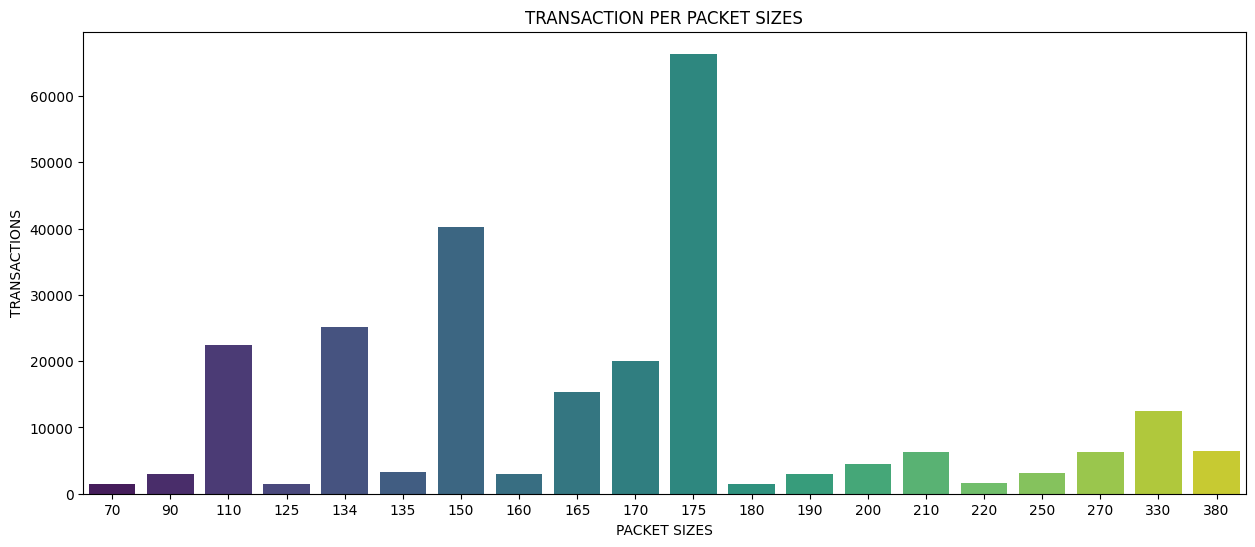

In [440]:
plt.figure(figsize=(15,6))
sns.barplot(transaction_by_sizes,x='SIZES', y='TRANSACTION',palette='viridis')
plt.xlabel("PACKET SIZES")
plt.ylabel("TRANSACTIONS")
plt.title("TRANSACTION PER PACKET SIZES")


---

## BRAND_NAME

In [441]:
transaction_data_sorted['BRAND_NAME']=transaction_data_sorted['PROD_NAME'].str.extract(r'^(\S+)')

In [442]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_freq,SIZE_VALUES(GRAM),BRAND_NAME
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,3304,175,Kettle
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle


In [443]:
transaction_data_sorted[transaction_data_sorted['BRAND_NAME']=='NCC']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_freq,SIZE_VALUES(GRAM),BRAND_NAME
30926,2019-06-30,74,74260,73117,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
220112,2019-06-28,71,71075,69407,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
60068,2018-11-21,90,90327,89052,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
132380,2018-07-14,225,225071,225088,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
132372,2018-11-29,225,225055,224991,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
...,...,...,...,...,...,...,...,...,...,...,...
243975,2019-02-12,70,70199,68636,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
53596,2018-07-21,247,247013,248682,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
28217,2018-09-02,1,1318,361,98,NCC Sour Cream & Garden Chives,1,3.0,1419,175,NCC
198460,2018-12-17,185,185072,187902,98,NCC Sour Cream & Garden Chives,1,3.0,1419,175,NCC


In [444]:
transaction_data_sorted['BRAND_NAME'].unique()

array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smiths',
       'Thins', 'Doritos', 'Pringles', 'Dorito', 'Twisties', 'Grain',
       'Cheezels', 'Infzns', 'Snbts', 'Natural', 'Burger', 'CCs', 'RRD',
       'Woolworths', 'Smith', 'WW', 'Red', 'Cheetos', 'GrnWves',
       'Sunbites', 'NCC', 'French'], dtype=object)

In [445]:
len(transaction_data_sorted['BRAND_NAME'].unique())

28

Here we can see some BRAND NAMES ARE THE SAME 
1. Red and RRD
1. Doritos and Dorito
1. Smiths and Smith
1. Infuzions and Infzns
1. Snbts and Sunbites
1. Grain and GrnWVES--> Grain Waves


In [446]:
brand_replacement_map={
    'RRD':'Red',
    'Dorito':'Doritos',
    'Smith':'Smiths',
    'Infzns': 'Infuzions',
    'Snbts':'Sunbites',
    'Grain':'Grain Waves',
    'GrnWVES':'Grain Waves'
}

In [447]:
transaction_data_sorted['BRAND_NAME']=transaction_data_sorted['BRAND_NAME'].replace(brand_replacement_map)

In [448]:
transaction_data_sorted['BRAND_NAME'].unique()

array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smiths',
       'Thins', 'Doritos', 'Pringles', 'Twisties', 'Grain Waves',
       'Cheezels', 'Sunbites', 'Natural', 'Burger', 'CCs', 'Red',
       'Woolworths', 'WW', 'Cheetos', 'GrnWves', 'NCC', 'French'],
      dtype=object)

In [449]:
len(transaction_data_sorted['BRAND_NAME'].unique())

23

In [450]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_freq,SIZE_VALUES(GRAM),BRAND_NAME
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,3304,175,Kettle
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle


In [451]:
transaction_data_sorted['LYLTY_CARD_NBR'].unique()

array([ 34057, 245223, 160226, ..., 186423,  51129,   9297],
      shape=(71287,))

Now it seems the Brand Name is also sorted and the entire transaction_data is sorted.

---

# Customer's Purchase Behaviour Data

In [452]:
purchase_behaviour_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [453]:
purchase_behaviour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [454]:
purchase_behaviour_data.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [455]:
purchase_behaviour_data['LYLTY_CARD_NBR'].unique()

array([   1000,    1002,    1003, ..., 2370751, 2370961, 2373711],
      shape=(72637,))

So basically in the transaction data there are 71287 unique LYLTY_CARD_NBR whereas here in customer's purchase behaviour dataframe there are 72637 unique customer LYLTY_CARD_NBR. <br>

Reason: <br>
In the Transaction dataframe, I had deleted the data about SALSA, which is most probably present in this purchase behaviour dataframe. <br>

Solution<br>
We need to keep all the data from the transaction dataframe and just keep the data that matches the data from the transaction data frame into a new_dataframe<br>
For that I am using left merge, making transaction data my reference dataframe.

In [456]:
merged_df=transaction_data_sorted.merge(purchase_behaviour_data, on='LYLTY_CARD_NBR', how='left')

In [457]:
merged_df.drop(columns='PROD_freq', axis=1, inplace=True)

In [458]:
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_VALUES(GRAM),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget
1,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget
2,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,OLDER SINGLES/COUPLES,Budget
3,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175,Kettle,OLDER FAMILIES,Budget
4,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-04-20,225,225142,225521,72,WW Crinkle Cut Original,2,3.4,175,WW,RETIREES,Mainstream
246736,2019-03-26,160,160161,161150,72,WW Crinkle Cut Original,2,3.4,175,WW,OLDER FAMILIES,Premium
246737,2018-11-14,53,53110,47364,72,WW Crinkle Cut Original,1,1.7,175,WW,YOUNG SINGLES/COUPLES,Budget
246738,2019-04-20,178,178228,178998,72,WW Crinkle Cut Original,2,3.4,175,WW,OLDER FAMILIES,Mainstream


In [459]:
merged_df['LYLTY_CARD_NBR'].unique()

array([ 34057, 245223, 160226, ..., 186423,  51129,   9297],
      shape=(71287,))

In [460]:
merged_df['PRICE_PER_PACKET']=merged_df['TOT_SALES']/merged_df['PROD_QTY']

The left join worked perfectly.

In [461]:
merged_df.to_csv('/Users/mriduldhungana/Documents/Forage Project/Quantium-Data-Analytics/merged_data.csv',index=False)

---

---

### <center>Data Analysis on Customer Segment</center>

Basically the questions we can ask here are:
1. Who spends the most on the chips (Customers of which Lifestage?)<br>
    (Customer of which lifestage belongs to which category)

1. How many customers are in each segment? <br>
    (What is the distribution of customers in each segment(Percentile of people and there effects))

1. How many chips are bought by the customer of the particular segment?<br>
    In what criteria is the customer classified as Budget, Mainstream and Premium (Whats the average transaction quantity and average chip price)

1. Over the period of time, whats the total expenditure of customer segments? <br>
    How it is or it is not different from the expenditure per transaction.


---

1. The most important question to clarify first is
'In what criteria is the customer classified as Budget, Mainstream and Premium'

In [462]:
merged_df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    95043
Budget        86762
Premium       64935
Name: count, dtype: int64

So all together there are around 95k Mainstream customers
86k Budget Customers and around 65K premium customers <br>

Basically Mainstream customers are at the highest count and the Premium customers are at the lowest count

Lets understand the total sales per mainstream customers


In [463]:
merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()

PREMIUM_CUSTOMER
Budget        7.277458
Mainstream    7.374193
Premium       7.282751
Name: TOT_SALES, dtype: float64

The average of total sales, i.e. average money spent seems to be equal among all the three different customer segments, but before going into the conclusion that it is not a differentiating point, lets perform other operations as well, as this subtle differences may also be significant.

In [464]:
merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

PREMIUM_CUSTOMER
Budget        631406.85
Mainstream    700865.40
Premium       472905.45
Name: TOT_SALES, dtype: float64

This analysis of calculating the sum maynot be as useful as the number of different premium customers are different hence this can justify the changes in values.

So basically as the number of premium customers are different and the average sales between different premium customers don't have much deviation,
it is hard to consider it as a significant differentiating factor.

* But one thing that may differentiate maybe the frequency of the chips bought

In [465]:
transaction_per_customers=merged_df.groupby(['PREMIUM_CUSTOMER','LYLTY_CARD_NBR']).size()

In [466]:
avg_frequency=transaction_per_customers.groupby(level=0).mean()
avg_frequency

PREMIUM_CUSTOMER
Budget        3.614180
Mainstream    3.307684
Premium       3.501105
dtype: float64

Even the average frequency of the customers purchase seems to be same.

* Price per item

In [467]:
merged_df['Price_per_item']=merged_df['TOT_SALES']/merged_df['PROD_QTY']


In [468]:
price_per_item=merged_df.groupby('PREMIUM_CUSTOMER')['Price_per_item'].mean()
price_per_item

PREMIUM_CUSTOMER
Budget        3.801726
Mainstream    3.873657
Premium       3.813059
Name: Price_per_item, dtype: float64

The thing here is the price_per_item of mainstream customer is maximum i.e. 3.87, but the catch is the budget customer's price per item and premium
customer's  price per item is less than mainstream customers and they don't even have much difference.

Hence for now we can say that price in itself may not be the differentiating factor.

---

Product Quantity 


In [469]:
merged_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].mean()

PREMIUM_CUSTOMER
Budget        1.910675
Mainstream    1.902086
Premium       1.907215
Name: PROD_QTY, dtype: float64

Even the product quantity bought is also the same.
This can be intuitive as if the average product quantity is same, then only the average prize can be this same.

---

Store Number

In [470]:
merged_df['STORE_NBR'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [471]:
customers_storeNBR=merged_df.groupby(['PREMIUM_CUSTOMER','STORE_NBR']).size().reset_index(name='count')
customers_storeNBR

,PREMIUM_CUSTOMER,STORE_NBR,count
0,Budget,1,179
1,Budget,2,157
2,Budget,3,518
3,Budget,4,489
4,Budget,5,494
...,...,...,...
796,Premium,268,128
797,Premium,269,426
798,Premium,270,366
799,Premium,271,358


In [472]:
Budget_Unique_store_NBR=customers_storeNBR[customers_storeNBR['PREMIUM_CUSTOMER']=='Budget']['STORE_NBR'].unique()
Budget_Unique_store_NBR

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [473]:
Store_list=list(Budget_Unique_store_NBR)
hypothetical_list=list(range(1,273))
result= Store_list==hypothetical_list

print('True' if result else 'False')

False


This show that not all the stores between 1 to 273 are the stores where Budget customers shop from. 
Show what maybe the remaining stores?

In [474]:
remaining=[x for x in hypothetical_list if x not in Store_list]
remaining

[76, 92, 206, 211, 252]

So basically from Store number 1 to 272 except store (72,92,206,211,252) Budget customers shot

In [475]:
Mainstream_Unique_store_NBR=customers_storeNBR[customers_storeNBR['PREMIUM_CUSTOMER']=='Mainstream']['STORE_NBR'].unique()
mainsteam_list=list(Mainstream_Unique_store_NBR)
remaining_mainstream= [x for x in hypothetical_list if x not in mainsteam_list]

In [476]:
remaining_mainstream

[11, 85, 211, 252]

So from 11, 85, 211 and 252 the Mainstream customers do not purchase thing.

In [477]:
Premium_Unique_store_NBR=customers_storeNBR[customers_storeNBR['PREMIUM_CUSTOMER']=='Premium']['STORE_NBR'].unique()
premium_list= list(Premium_Unique_store_NBR)
remaining_premium= [x for x in hypothetical_list if x not in premium_list]
remaining_premium

[31, 76, 92, 193, 206, 211]

So premium customers don't buy from 31,76,92,193,206,211 store NBRs and buy from other all stores from 1 to 272.

So basically, 
Budget customers don't buy from stores 76, 92, 206,211,252. <br>
Mainstream customers buy from all including 76,92,206 but don't buy from 11, 85,211,252 (Budget customers and premium customers buy from  11, and 85) and premium customers buy from 252 as well. <br>
Premium customers don't buy from store 31, 76, 92, 193, 206 and 211.<br>

So, 
Store 252 is the store where only premium customers buys chips.<br>
Store 211, none of the customers buy chips(it may be due to removing the salsa data)<br>
Store 76 is the store where only the mainstream customers buy the chips
 

This illustrates that the store numbers can be a differentiating factor.

Lets just validate this claim of mine:

In [478]:
customers_storeNBR[customers_storeNBR['STORE_NBR']==252]['PREMIUM_CUSTOMER'].unique()

array(['Premium'], dtype=object)

In [479]:
customers_storeNBR[customers_storeNBR['STORE_NBR']==211]['PREMIUM_CUSTOMER'].unique()

array([], dtype=object)

In [480]:
customers_storeNBR[customers_storeNBR['STORE_NBR']==76]['PREMIUM_CUSTOMER'].unique()

array(['Mainstream'], dtype=object)

So from here we only got a single differentiating factor that the customer buying from 252 is premium customer and the customer buying from 76 is the mainstream customer.
But as the total store Nbr is 272, it will be very hard for us to differentiate just using this factor as the premium and mainstream customers also buys from other stores.

#### <center> Summary: </center>
Question: What criteria differentiates Budget, Mainstream and Premium Customers?
<br>
Analysis Performed:
1. Average tranasction amount: $ 7.27-7.37 (no significant difference)
1. Purchase Frequency: 3.3- 3.6 transactions per customers (minimal variation)
1. Price per item: $ 3.80 -3.87 (virtually identical)
1. Product Quantity: ~1.90-1.91 items per transaction(no difference)
1. Store location: Only 2 out of 272 stores show segment exclusivity

<br> <br>

Key Findings: <br>
The customer segmentation into Budget, Mainstream, and Premium categories doesnot correlate with the observable purchasing behaviour. All three segments exhibit nearly identical spending patterns, purchase frequencies and product preferences.

<br>

Implication: This suggest the classifications of the customers is likely based on the external factore not captured in the transactional data such as:
1. Demographics(age, income, householdsize)
1. Geographic location beyond the store number
1. Loyalty program tier
1. Customer acquisition channel

<br>
Strategic Recommendation: <br>
Since behavioral differnces are negligible, business decisions should prioritize segments based on revenue contributions and customer volume rather than assumed behavioral differnces.

---

2. Who spends the most on chips?

In [481]:
result=merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().reset_index(name='count')
result['percentage']=result.groupby('LIFESTAGE')['count'].transform(lambda x: 100*x/x.sum()).round(2)

In [482]:
pivot=result.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER',values='percentage')

In [483]:
pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,20.05,47.42,32.53
NEW FAMILIES,43.47,33.63,22.90
OLDER FAMILIES,47.64,29.32,23.04
OLDER SINGLES/COUPLES,33.81,33.59,32.60
RETIREES,30.64,43.01,26.35
YOUNG FAMILIES,43.87,29.50,26.63
YOUNG SINGLES/COUPLES,25.24,57.53,17.23


Findings:
1. OLDER FAMILIES had highest percentage of Budget Customers and lowest percentage of Mainstream customers among all
1. Young Singles/ Couples had highest percentage of Mainstream customer and lowest percentage of premium customers among other lifestages
1. Older singles and couples are highest percentage of premium customers, just little more that the MIDAGE SINGLES AND COUPLES.

#### AMONG THE ENTIRE PREMIUM CUSTOMERS LETS CHECK HOW MANY PERCENTAGE BELONGED TO DIFFERENT LIFESTAGES

In [484]:
result_1=merged_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().reset_index(name='count')
result_1['percentage']=result_1.groupby('PREMIUM_CUSTOMER')['count'].transform(lambda x: 100*x/x.sum()).round(2)

In [485]:
pivot_1=result_1.pivot(index='PREMIUM_CUSTOMER',columns='LIFESTAGE',values='percentage')

In [486]:
pivot_1

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,5.41,3.25,24.80,19.79,16.40,20.47,9.88
Mainstream,11.67,2.30,13.93,17.95,21.01,12.57,20.56
Premium,11.72,2.29,16.02,25.50,18.84,16.61,9.01


Findings:
1. Among the Budget Customers  20.47% of the entire Budget customer was young family (which was the highest), whereas 3.25% of the entire budget customers were the new families which is the lowest. <br>
('While buying chips new family apparently spend more compared to the older families')<br>

1. Around 21% of mainstream customers and 20.56% of mainstream customers are RETIREES and Young Singles/ Couples while only 2.30 of the New familes are the mainstream customers.

1. Around 18.84% of the Retirees and 16.61% of Young familes are the premium customers while 2.29 % of the new families are the premium customers.

Summary Understanding:
1. New Families are at Lifestage that spend the least on the chips, where as the Retirees, older families, Young families seem to spend much more compared to them

Let's check total sales by Lifestage and Premium Customers

In [487]:
tot_sales=merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

In [488]:
pivot_2=tot_sales.pivot(index='LIFESTAGE',columns='PREMIUM_CUSTOMER',values='TOT_SALES')
pivot_2

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,75242.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(1, 0, 'NEW FAMILIES'),
  Text(2, 0, 'OLDER FAMILIES'),
  Text(3, 0, 'OLDER SINGLES/COUPLES'),
  Text(4, 0, 'RETIREES'),
  Text(5, 0, 'YOUNG FAMILIES'),
  Text(6, 0, 'YOUNG SINGLES/COUPLES')])

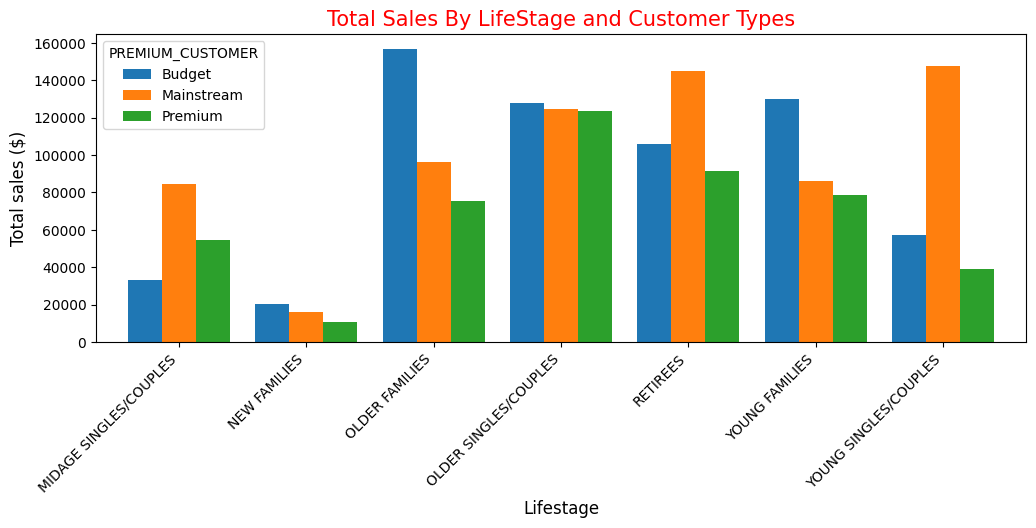

In [489]:
pivot_2.plot(kind='bar',figsize=(12,4),width=0.8)
plt.title("Total Sales By LifeStage and Customer Types", fontsize=15, color='Red')
plt.xlabel('Lifestage', fontsize=12)
plt.ylabel('Total sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

Basically using this graph we can validate our claim that the New Families spend the least on the chips.<br>




Hypothesis:
Mainstream customers seems to contribute more to the revenue if not equal to the budget customers and premium customers seems to contribute the least.

Text(0, 0.5, 'Total Sales ($)')

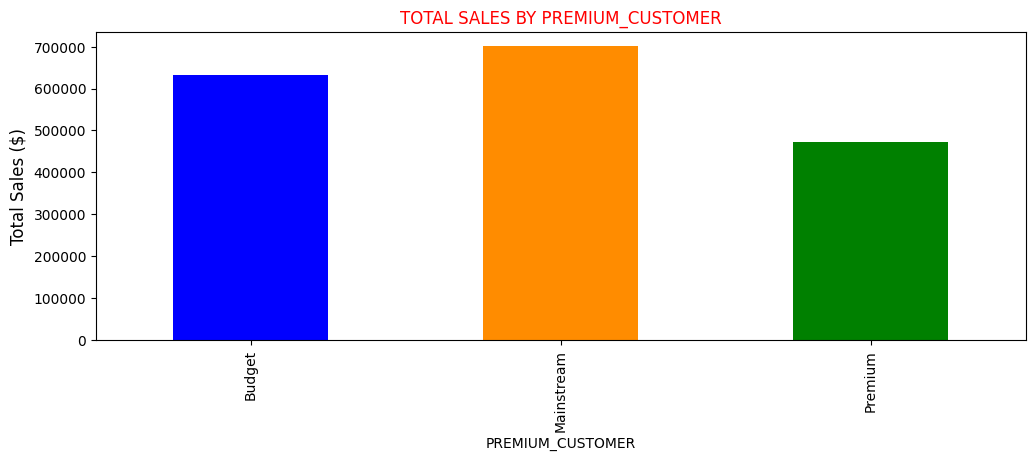

In [490]:
Premium_customers_spending=merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
Premium_customers_spending.plot(kind='bar', color=['blue','darkorange','green'],figsize=(12,4))
plt.title('TOTAL SALES BY PREMIUM_CUSTOMER', color='red')
plt.ylabel('Total Sales ($)',fontsize=12)

Hence, this graph validates that the Mainstream customers are the revnue driver of this business than the Budget customers and Premium customers are not much of the spender (it may be due to the size of the population)

Text(0, 0.5, 'Total Sales ($)')

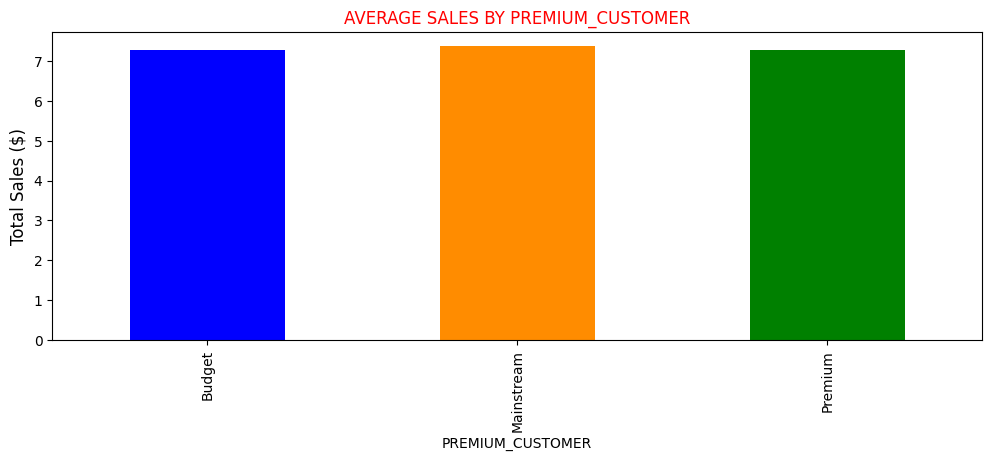

In [491]:
Premium_customers_spending=merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()
Premium_customers_spending.plot(kind='bar', color=['blue','darkorange','green'],figsize=(12,4))
plt.title('AVERAGE SALES BY PREMIUM_CUSTOMER', color='red')
plt.ylabel('Total Sales ($)',fontsize=12)

Here the average purchase seem to be somehow same.

#### <center>Summary </center>

Question: Who spend the most on the chips?
<br>

Analysis performed:<br>
1. Total sales by customer segments
1. Sales breakdown by Lifestage and customer segment
1. Average Spending per customers
<br>

Key Findings:
1. Mainstream customers are the revnue drivers followed by budget customers and Premium customers.<br>
    Why? Volume not value. Maisnstream has more customers than Budget and the Premium have least of them all. Average spending is identical(~$7.28- ~7.37 per customer).
2. New Families spend the least.
    * Consistenly lowest spending across all customer types
    * Represents lowest value lifestage segment

3. Lifestage patterns varies by customer types.
  * Budget leads older families, older singles/ couples, young families
  * Mainstream leads Midage singles/ couples, retirees, young singles/couples.
  * Premium never leads.

<br>
Strategic Implication: <br>
Since the behavioral differnce between the segments are negligible and average spending is identical, revenue is purely volume driven. Business strategy should be:
 
 * Priortize Mainstream and Budget customers
 * Focus on acquisitions of high value lifestages (Older Families, Retirees, Singles/Couples)
 * Investigate why Premium customers underperform and how to cater them.

1. New families spend the least on the chips.
1. Mainstream customers are the driving force of the revenue('That is not because of there high avg. purchase but instead of being high percentage of the population')
Hence we should not forget that Mainstream Customers and Budget Customers are the driving factors of our revenue and we should cater them equally as the Premium customers 
as the avg price spent of all the customers are the same.

----

Q3. Is the product quantity differentiating factor between the customer of different classes.

Null Hypothesis: The product quantity ('inferentially profitability') is the differentiating factor betwen the customer segments.
<br>
Alternative Hypothesis: No, the product quantity is not the differentiating factor between the customer segments.

Text(0.5, 1.0, 'Number of chips Bought by Lifestage')

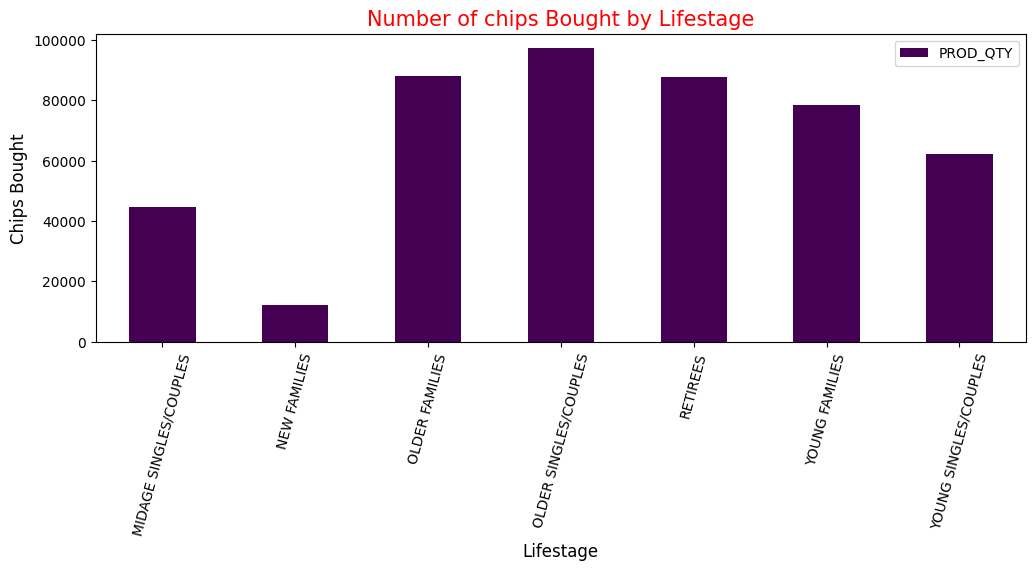

In [492]:
prod_quan=merged_df.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index()
prod_quan.plot(kind='bar',x='LIFESTAGE',y='PROD_QTY',colormap='viridis',figsize=(12,4))
plt.xlabel('Lifestage',fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Chips Bought',fontsize=12)
plt.title('Number of chips Bought by Lifestage', color='red',fontsize=15)



Here we see older familes, older singles/ couples, retirees(mostly old people ) and young
families consume the most chips.

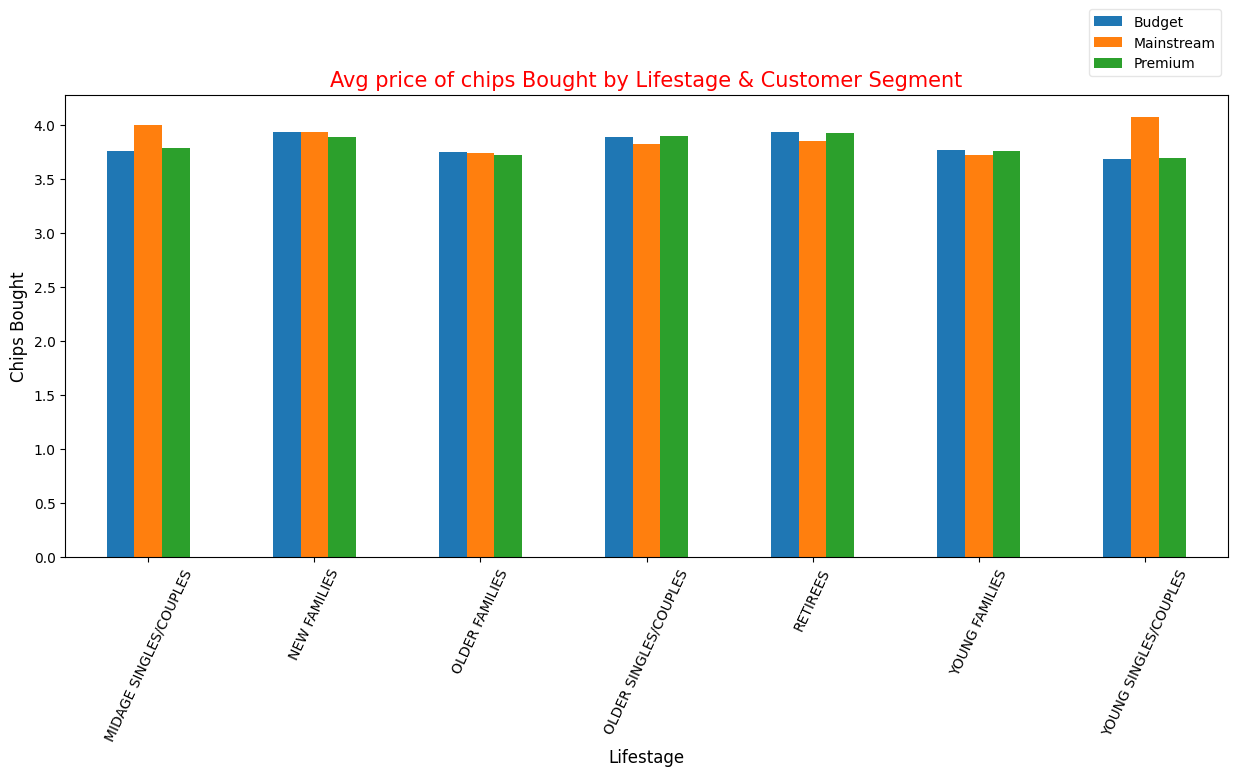

In [493]:
avg_prod_price=merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES','PROD_QTY']].sum().reset_index()
avg_prod_price['AVG_PRICE']=avg_prod_price['TOT_SALES']/avg_prod_price['PROD_QTY']
pivot_4=avg_prod_price.pivot(index='LIFESTAGE',columns='PREMIUM_CUSTOMER',values='AVG_PRICE')
pivot_4.plot(kind='bar',figsize=(15,6))
plt.xlabel('Lifestage',fontsize=12)
plt.xticks(rotation=65)
plt.ylabel('Chips Bought',fontsize=12)
plt.title('Avg price of chips Bought by Lifestage & Customer Segment', color='red',fontsize=15)
plt.legend(loc='upper right',framealpha=0.5,bbox_to_anchor=(1,1.2))



Here we can see that the Mainstream Midage and young singles/couples are more willing to pay more per packets of chips compared to their budget and premium counterparts.
This maybe due to the premium customers being more likely to buy healthy snacks and they just buy chips in low amount (just for the sake of break or enjoyment) rather 
than their own consumption.

As the difference between the average price per unit is not large, we can check whether it is statistically different or not.<br>
We are going to check if the Mainstream midage and young singles/couples are different from there Budget and Premium counterparts.

Null Hypothesis: Average Price per packet of Mainstream customer is not different from the average price per packet of non stream customers(Budget and Premium)
and life stage Midage Singeles/ Couples and Young singles/ couples
<br>

Alternative Hypothesis:Average Price per packet of Mainstream customer is different from the average price per packet of non stream customers(Budget and Premium)
and life stage Midage Singles/ Couples and Young singles/ couples

In [494]:
from scipy import stats
target_lifestages=['MIDAGE SINGLE/ COUPLES', 'YOUNG SINGLES/COUPLES']
target_data=merged_df[merged_df['LIFESTAGE'].isin(target_lifestages)].copy()
target_data['Price_Per_Unit']=target_data['TOT_SALES']/target_data['PROD_QTY']

mainstream=target_data[target_data['PREMIUM_CUSTOMER']=='Mainstream']['Price_Per_Unit']

non_mainstream=target_data[
    (target_data['PREMIUM_CUSTOMER']=='Budget') |
    (target_data['PREMIUM_CUSTOMER']=='Premium')
]['Price_Per_Unit']

#ttest
t_stat,p_value=stats.ttest_ind(mainstream,non_mainstream)
print(f"T_statistic: {t_stat:.4f}")
print(f"P value: {p_value:.4f}")

T_statistic: 35.3392
P value: 0.0000


The P value is less than 0.05, hence we reject the null hypothesis. <br>

There is EXTREMELY STRONG statistical evidence that Mainstream 
customers in the Midage and Young Singles/Couples lifestages 
pay significantly more per packet of chips than Budget and 
Premium customers in the same lifestages.

Business Impact:
This segment represents a premium pricing opportunity with 
customers who are willing to pay more for chips.


Which brands does this Mainstream Midage and Young single/ couples prefer?

In [495]:
mainstream_brand=target_data[target_data['PREMIUM_CUSTOMER']=='Mainstream']['BRAND_NAME'].unique()
mainstream_brand


array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smiths',
       'Thins', 'Doritos', 'Pringles', 'Twisties', 'Grain Waves',
       'Cheezels', 'Sunbites', 'Natural', 'Burger', 'CCs', 'Red',
       'Woolworths', 'WW', 'Cheetos', 'GrnWves', 'NCC', 'French'],
      dtype=object)

In [496]:
brand_names=merged_df['BRAND_NAME'].unique()
brand_names

array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smiths',
       'Thins', 'Doritos', 'Pringles', 'Twisties', 'Grain Waves',
       'Cheezels', 'Sunbites', 'Natural', 'Burger', 'CCs', 'Red',
       'Woolworths', 'WW', 'Cheetos', 'GrnWves', 'NCC', 'French'],
      dtype=object)

In [497]:
# Checking whether mainstream midage single and couples and young single and couples customers donnot prefer certain brands?
brands_missing=[x for x in brand_names if x not in mainstream_brand]
brands_missing

[]

Hence mainstream midage single and couples and young single and couples cusotmers have made some purchases in every brand.

But let's check how much they prefer one.

Text(0, 0.5, 'Frequencies')

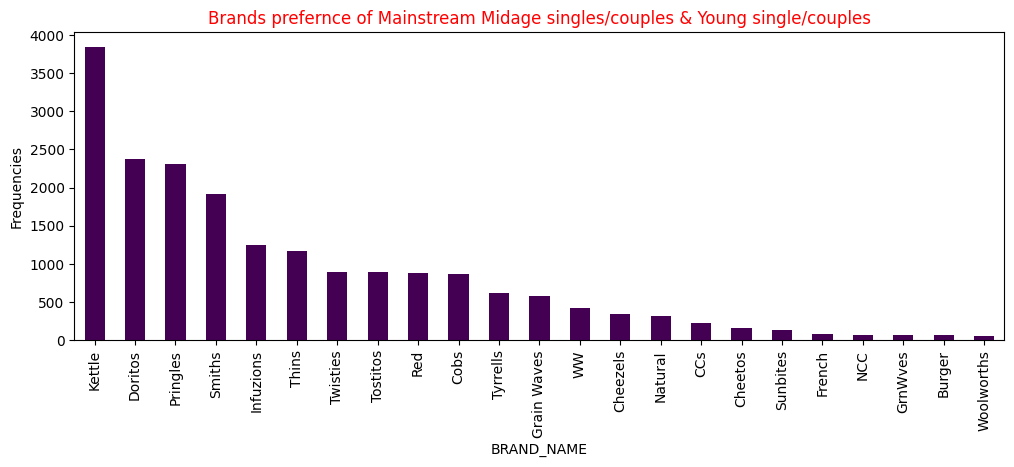

In [498]:
brand_names_frequencies=target_data[target_data['PREMIUM_CUSTOMER']=='Mainstream']['BRAND_NAME'].value_counts()
brand_names_frequencies.plot(kind='bar',figsize=(12,4),colormap='viridis')
plt.title('Brands prefernce of Mainstream Midage singles/couples & Young single/couples',color='red')
plt.ylabel('Frequencies')

Here we can see Mainstream customers in Midage and Young singles/couples who are willing to pay significantly more prefer brands like Kettle, Doritos, Pringles and Smiths. As the frequency of kettle(~3800, Doritos: ~2300, Pringles: ~2500, Smiths:~ 1900)
This brand may not be effected even if they increase their price by a little amount.
<br>
But before jumping in this conclusion, let's validate it by checking the preference of all customers.

Text(0, 0.5, 'Frequencies')

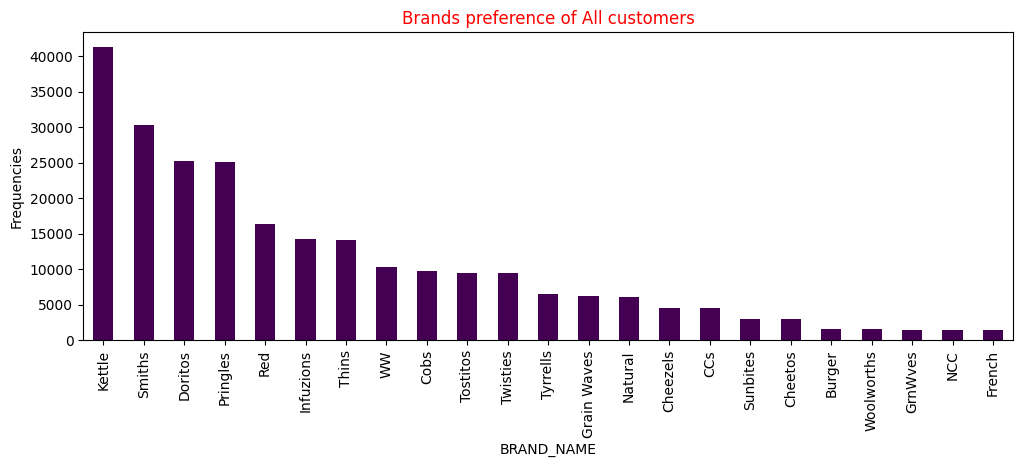

In [499]:
brand_preference_all_customers=merged_df['BRAND_NAME'].value_counts()
brand_preference_all_customers.plot(kind='bar',figsize=(12,4),colormap='viridis')
plt.title('Brands preference of All customers',color='red')
plt.ylabel('Frequencies')

Overall, in the entire customer data, this trend of prefernce of Kettle, Smiths, Doritos and Pringles is higher compared to other brands.
This may be due to the shelf case, brand visibility, mere taste or promotion.

Lets visualize mainstream customers brand preference in the deep.

In [500]:
#Heat maps of the top 10 brands
mainstream_brands=merged_df[merged_df['PREMIUM_CUSTOMER']=='Mainstream']
heatmap_data=mainstream_brands.groupby(['LIFESTAGE','BRAND_NAME']).size().unstack(fill_value=0)

#top 10 brands
top_brands=heatmap_data.sum(axis=0).nlargest(10).index
heatmap_data=heatmap_data[top_brands]
heatmap_data

BRAND_NAME,Kettle,Smiths,Doritos,Pringles,Red,Infuzions,Thins,Cobs,Twisties,Tostitos
LIFESTAGE,,,,,,,,,,
MIDAGE SINGLES/COUPLES,2136,1276,1210,1159,611,679,635,495,490,479
NEW FAMILIES,414,244,257,224,134,126,115,96,84,89
OLDER FAMILIES,2019,1742,1263,1234,1047,717,746,505,458,452
OLDER SINGLES/COUPLES,2835,2070,1791,1720,1112,959,949,699,634,664
RETIREES,3386,2367,2089,2103,1223,1182,1199,776,802,739
YOUNG FAMILIES,1789,1681,1125,1148,922,637,626,454,417,424
YOUNG SINGLES/COUPLES,3844,1921,2379,2315,875,1250,1166,864,900,890


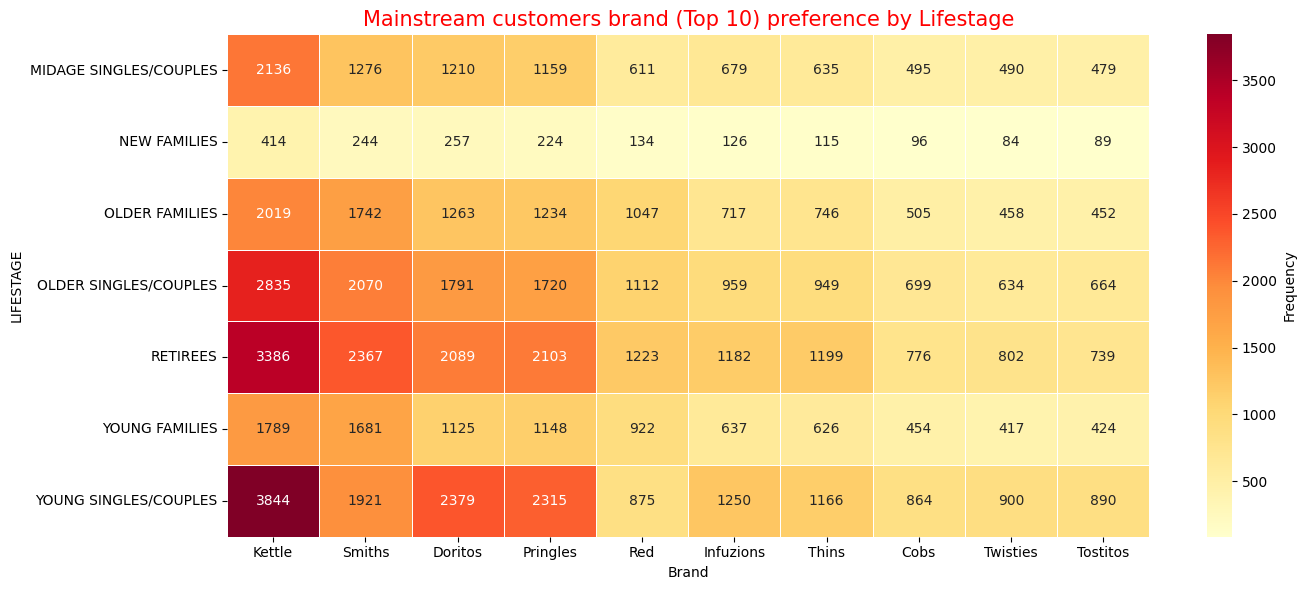

In [501]:
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, annot=True, fmt='d',cmap='YlOrRd',cbar_kws={'label':'Frequency'},linewidths=0.5,linecolor='white')
plt.title('Mainstream customers brand (Top 10) preference by Lifestage', color='red', fontsize=15)
plt.xlabel('Brand')
plt.ylabel('LIFESTAGE')
plt.tight_layout()

Findings:
1. Kettle column shows consistently deep red across all lifestages indicating it as a clear market leader.
1. Kettle, Smiths, Doriots , Pringles display warm color, showing high preference
1. Righs side brands (Cobs, Twisties, Tostitos) show pale yellow- low preference

Lifestage Consumption:
1. Young singles/ couples row is the darkest overall, showing the highes consuming segment.
1. Retirees row shows strong red tones-- second highes consumption
1. New Families row is palest across all brands -- lowest engagement
1. Singles/ Couples lifestages(Young, Midage, Older) consistently show warmer colors than family segments.

Important Findings:
1. Kettle dominates universally, it is the most preferred by all the lifestages.
1. Big 4 bramds are kettle, Smiths, Doritos, and Pringles
1. Singles/ Couples consume more chips than families across all brands.
1. Young Singles/ Couples drive the highest volume - most valuable target segment.


#### <center>Summary:</center> <br>
Q. Is the product quantity differentiating factor between the customers of different clasees?
<br>
Part 1: 
Analytics Performed:<br>
1. Number of chips Bought by Lifestage
1. Average price of chips Bought by Lifestage & Customer Segment
<br>
Findings: <br>
1. Older Families, older singles/couples, retirees(mostly old people) and young families consume the most chips.
1. Mainstream midage singles/couples and young singles/couples are willing to pay more per packet of chips compared to their budget and premium counterpart.
(Proven by t-test)


Part2:
<br>
Q. Which brand does this Mainstream Midage and Young single/couples prefer?

Analytics Performed:
1. Brand preference of Mainstream Midage singles/ couples & Young single/couples
1. Brand preference of All customers
1. Mainstream customers brand preference by Lifestage

Key Findings:
1. Kettle dominates universally (it is the most preferred by all the lifestages including the Midage singles/ couples & Young single/ couples)

1. The Big 4 Brands of the customers are kettle, Smiths, Doritos, and Pringles.

1. Singles/ Couples consume more chips than families across all the brands.

1. Young Singles/ Couples drive the highest volume- most valuable target segment.

Business Recommendations:

1. Premium Pricing Strategy:
    The Big 4 nramds (Kettle, Doritos, Pringles, Smiths) can likely sustain moderate price increases among the Mainstream midage singles/ couple & Young singles/ couples without significant cusotmer loss, given their demonstrated willingness to pay premium prices.

1. Inventory Optimization:
    * Prioritize shelf space and stock levels for kettle
    * Doritos, Pringles, and Smiths should be the secondary priorities
    * Shelf space of Tier 3 brands can be reduced.

1. Marketing Focus:
    Target Marketing Campaigns for premium brands specifically at:
    * Young Singles/ Couples (as they are the highest volume potential)
    * Retirees-- they are overlooked high-value segment
    

Conclusion:
 THe Mainstream customers in Midage and Young Singles/ Couples lifestages demonstrates clear, statistical significant preference for premium chips brands, with kettle dominating as a favorite. This customers show the willingness to pay more for their preferred brands, presenting a valuable pricing oppurtunity. The big 4 brands (Kettle, Doritos, Pringles, Smiths) should be prioritized in inventory, shelf placement, and marketing strategies targeting these high- value customer segment. 



----

Q4. The customers who are willing to pay more do tend to buy a larger packs of chips or not?

In [502]:
mainstream_chips_size=target_data[target_data['PREMIUM_CUSTOMER']=='Mainstream']['SIZE_VALUES(GRAM)'].unique()
mainstream_chips_size


array([175, 150, 110, 165, 135, 380, 170, 134, 330, 270, 250, 210,  90,
       220, 190, 200,  70, 160, 180, 125])

In [503]:
merged_df['SIZE_VALUES(GRAM)'].unique()

array([175, 150, 110, 165, 135, 380, 170, 134, 330, 270, 250, 210,  90,
       220, 190, 200,  70, 160, 180, 125])

So, here we can observe that the Midage single/ couples and young single/ couples have bought every size of chips packet.
But, for understanding their preference lets dive deeper.

Text(0, 0.5, 'Frequencies')

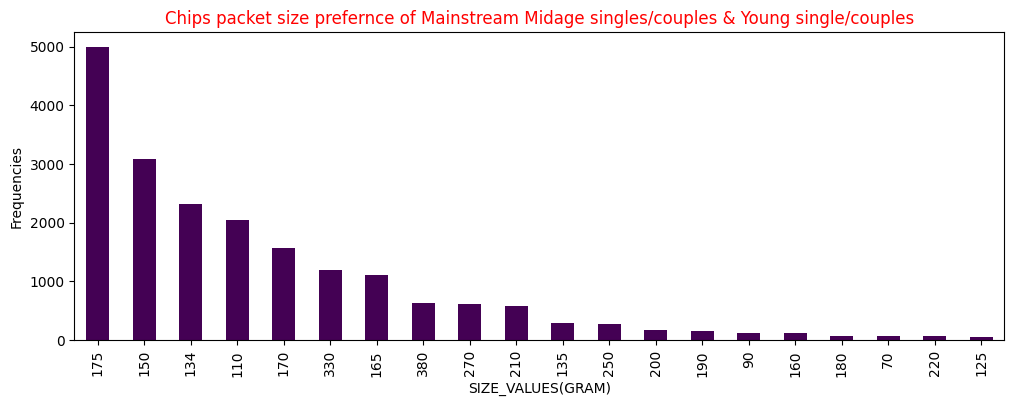

In [504]:
chip_size_frequencies=target_data[target_data['PREMIUM_CUSTOMER']=='Mainstream']['SIZE_VALUES(GRAM)'].value_counts()
chip_size_frequencies.plot(kind='bar',figsize=(12,4),colormap='viridis')
plt.title('Chips packet size prefernce of Mainstream Midage singles/couples & Young single/couples',color='red')
plt.ylabel('Frequencies')

Here we can see that the packet size preference of our customer willing to pay more is 175g (our highest packet size)

Is this trend same in the other cases as well?

Text(0, 0.5, 'Frequencies')

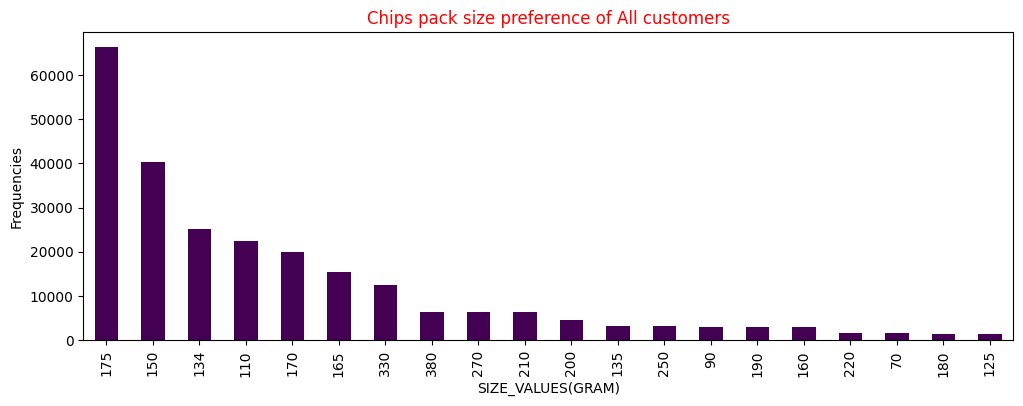

In [505]:
chip_size_preference_all_customers=merged_df['SIZE_VALUES(GRAM)'].value_counts()
chip_size_preference_all_customers.plot(kind='bar',figsize=(12,4),colormap='viridis')
plt.title('Chips pack size preference of All customers',color='red')
plt.ylabel('Frequencies')

Overall, this trend of higher demand of the bigger size is the same.

#### <center> Summary </center> <br>
Q4. Customers who are willing to pay more tend to buy a larger packs of chips or not?
<br>
Key Finding:
<br>
No- Customers willing to pay more (Mainstream Segment) do not prefer the largest available pack sizes.
The preference is actually for the mid sized packets.
1. 175g is the most popular
1. 150 g second
1. Larger sizes like 270g, 330g, 380g have much lower demand.
This pattern holds across all customer segmenets 
<br>

So, increasing the pack size and the pack price will be a bad strategy.
1. Large pack sizes (270g, 330g, 380g) already exists but are at a very low demand
1. Mainstream customers are actively choosing 175g over larger available options.
1. This suggest 175g is the optimal sweet spot for the individual/ couple consumption.

Question:
Why larger packs fail?

In [506]:
price_analysis=merged_df.groupby('SIZE_VALUES(GRAM)').agg({
    'PRICE_PER_PACKET':'mean',
    'LYLTY_CARD_NBR':'count'

}).reset_index()

price_analysis.columns=['Pack_Size','Avg_Price','Frequency']
price_analysis=price_analysis.sort_values('Pack_Size')


In [507]:
price_analysis

,Pack_Size,Avg_Price,Frequency
0,70,2.400000,1507
1,90,1.700000,3008
2,110,3.799915,22387
3,125,2.100000,1454
4,134,3.699838,25102
5,135,4.200000,3257
6,150,3.773747,40203
7,160,1.900000,2970
8,165,3.486331,15297
9,170,3.846597,19983


Text(0.5, 1.0, 'Why do Larger Packs Fail?')

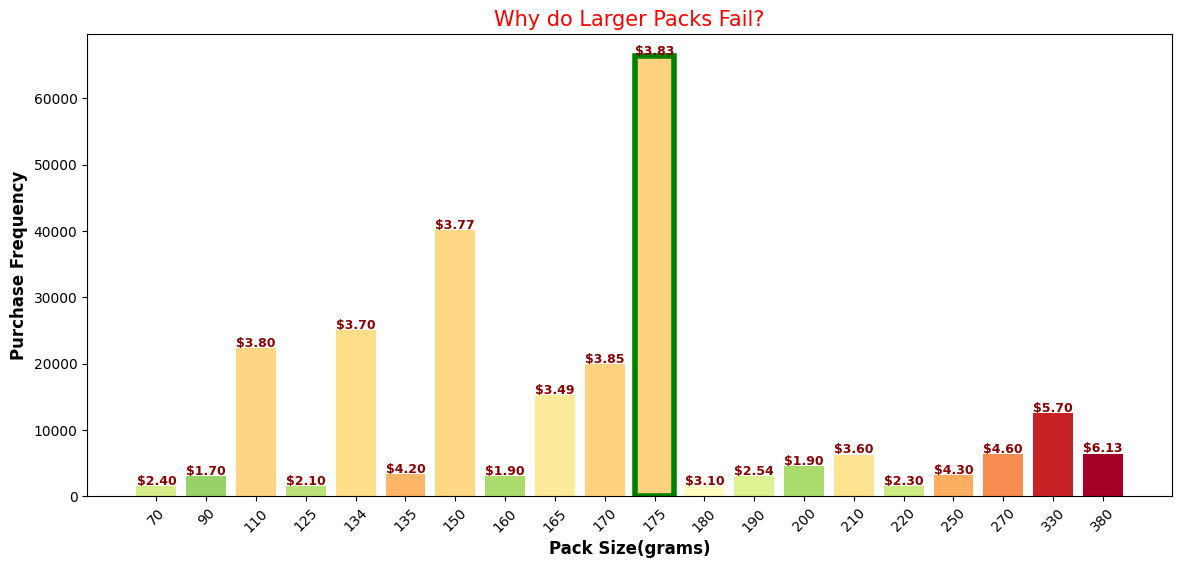

In [508]:
fig, ax=plt.subplots(figsize=(14,6))
price_analysis_sorted=price_analysis.sort_values('Pack_Size')
bars=ax.bar(range(len(price_analysis_sorted)),
            price_analysis_sorted['Frequency'],
            color=plt.cm.RdYlGn_r(price_analysis_sorted['Avg_Price']/price_analysis_sorted['Avg_Price'].max()))

ax.set_xticks(range(len(price_analysis_sorted)))
ax.set_xticklabels(price_analysis_sorted['Pack_Size'].astype(int),rotation=45)
ax.set_xlabel('Pack Size(grams)', fontsize=12,fontweight='bold')
ax.set_ylabel('Purchase Frequency', fontsize=12, fontweight='bold')

for i, (idx, row) in enumerate(price_analysis_sorted.iterrows()):
    ax.text(i, row['Frequency']+ 200,
            f"${row['Avg_Price']:.2f}",
            ha='center', fontsize=9, fontweight='bold', color='darkred')
            
#HIGHLIGHT 175G
highlight_idx=price_analysis_sorted[price_analysis_sorted['Pack_Size']==175].index[0]
highlight_pos=price_analysis_sorted.index.get_loc(highlight_idx)
bars[highlight_pos].set_edgecolor('green')
bars[highlight_pos].set_linewidth(4)

plt.title("Why do Larger Packs Fail?", color='red', fontsize=15)


Summary:
 From here we can observe that the average prize of other larger packets and other smaller packets are less compared to the most popular 175g packet
Hence, from here we can understand that the customer actually want (175g) regardless of the price.



Key conclusion:<br>
1. The 175g packet size represents the optimal sweet spot. Even if the average price per packet of this size is not less compared to others, the 
demand of this size is pretty high. This can be influenced by the fact that Midage and Young single/couples or Retirees are the highest chip consumers rather than families.
1. The larger packs fails despite lower price per gram confirming that 175g aligns with actual consumption needs rather than value-seeking behaviour.

---

Is customer Size choices Independent of Brands?

Null Hypothesis: Size choice is independent of the brands. <br>
Alternative Hypothesis: Size choice is dependent on the brands.

Two categorical variables (Chi square test)

In [509]:
from scipy.stats import chi2_contingency

In [510]:
contigency_table=pd.crosstab(
    merged_df['BRAND_NAME'],
    merged_df['SIZE_VALUES(GRAM)']
)
contigency_table

SIZE_VALUES(GRAM),70,90,110,125,134,135,150,160,165,170,175,180,190,200,210,220,250,270,330,380
BRAND_NAME,,,,,,,,,,,,,,,,,,,,
Burger,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1564,0,0,0,0
CCs,0,0,0,0,0,0,0,0,0,0,4551,0,0,0,0,0,0,0,0,0
Cheetos,0,0,0,0,0,0,0,0,1448,0,0,0,1479,0,0,0,0,0,0,0
Cheezels,0,0,0,1454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3149,0
Cobs,0,0,9693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Doritos,0,0,0,0,0,0,6376,0,0,12613,0,0,0,0,0,0,0,0,3052,3183
French,0,0,0,0,0,0,0,0,0,0,1418,0,0,0,0,0,0,0,0,0
Grain Waves,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6272,0,0,0,0,0
GrnWves,0,0,0,0,0,0,0,0,0,0,0,1468,0,0,0,0,0,0,0,0


In [511]:
chi2,p_value,dof,expected_freq=chi2_contingency(contigency_table)
print(f"""chi2: {chi2}
        p_value: {p_value}
        dof: {dof}
        """)

chi2: 2608082.6361168395
        p_value: 0.0
        dof: 418
        


This huge chi2 value and p-value tell us that brand_name and size are strongly related.
This high chi2 value is due to different brands manufacturing completely different sizes.
Hence, this tells us that there is some relation between packet sizes and brands.
<br><br>
<b>But main question is:</b><br>
Is the preference of 175g is particularly due to famous brands like kettles or do customers prefer it equally across all the brands.

In [512]:
brands_with_175g=merged_df[merged_df['SIZE_VALUES(GRAM)']==175]['BRAND_NAME'].unique()
brands_with_175g

array(['Kettle', 'Tostitos', 'Thins', 'Smiths', 'Natural', 'CCs', 'WW',
       'NCC', 'French'], dtype=object)

In [513]:
brand_175_shares=[]
for brand in brands_with_175g:
    brand_data=merged_df[merged_df['BRAND_NAME']==brand]
    total_brand_sales=len(brand_data)
    sales_175=len(brand_data[brand_data['SIZE_VALUES(GRAM)']==175])
    percentage_175=(sales_175/total_brand_sales)*100

    brand_175_shares.append({
        'Brand':brand,
        'Total_Sales':total_brand_sales,
        '175g_Sales':sales_175,
        '175g_share':percentage_175
    })

In [514]:
df_shares=pd.DataFrame(brand_175_shares).sort_values('175g_share',ascending=False)
df_shares

,Brand,Total_Sales,175g_Sales,175g_share
1,Tostitos,9471,9471,100.000000
2,Thins,14075,14075,100.000000
4,Natural,6050,6050,100.000000
5,CCs,4551,4551,100.000000
7,NCC,1419,1419,100.000000
8,French,1418,1418,100.000000
0,Kettle,41288,19022,46.071498
6,WW,10320,2877,27.877907
3,Smiths,30353,7507,24.732316


In [515]:
mean_share=df_shares['175g_share'].mean()
std_share=df_shares['175g_share'].std()
cv=(std_share/mean_share)*100
cv

np.float64(43.85326618884678)

The coffiecient of variance is : 43.8<br>
This means there is a moderate variation<br>
175g popularity varies somewhat by brands. Both brands and size influence the customers.
Yes 175g size is popular but not across all the brands.

Visualization:

/var/folders/k6/dk7cqd9513v3sf54fjc78_fr0000gn/T/ipykernel_9756/3923912653.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



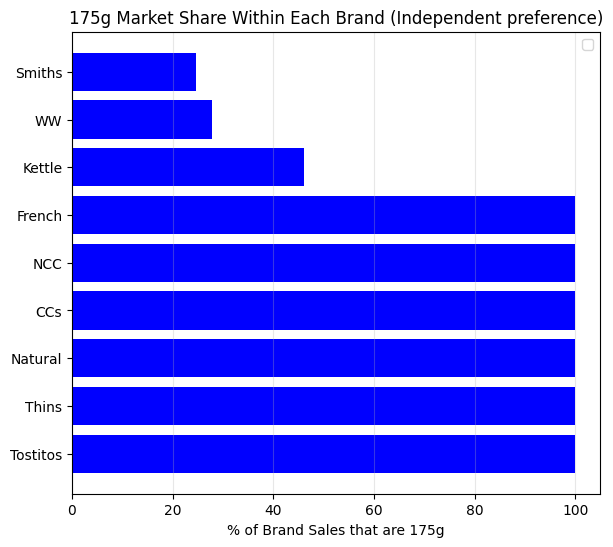

In [ ]:
fig, axes=plt.subplots(1,2, figsize=(15,6))
ax1=axes[0]
brands_to_plot=df_shares
ax1.barh(range(len(brands_to_plot)),brands_to_plot['175g_share'], color='blue')
ax1.set_yticks(range(len(brands_to_plot)))
ax1.set_yticklabels(brands_to_plot['Brand'])
ax1.set_xlabel('% of Brand Sales that are 175g')
ax1.set_title('175g Market Share Within Each Brand (Independent preference)' )

ax1.grid(axis='x', alpha=0.3)

ax2=axes[1]
ax2.set_visible(False)





---

---

## <center> <b>  Final Conclusion & Strategic Recommendation </b> </center>
<br><br>


#### Executive Summary: <br>
This comprehensive analysis of Quantium's chip purchase data reveals critical insights about customer behaviour, product preferences, and revenue drivers that challenge conventional segmentation assumptions.

<br> 


##### Key Findings across all Metrics:

1. Customer Segmentation Reality:
<br> Budget, Mainstream, and Premium segments show no meaningful behavioral differences.
 * Average transaction amounts: $ 7.27-7.37(virtually identical)
 * Purchase frequency: 3.3-3.6 transactions per customers(minimal variation)
 * Product Quantity: ~1.90-1.91 items per transaction(no difference) 

 Implication: Current segmentation is likely based on external factors (demographics, loyalty programns) not captured in transactional data, making it less useful for inventory and marketing decisions.<br>

2. Revenue Driver
<br> Mainstream customers are the revenue engine (volume driven, not value-driven)
* Highest customer count drives total revenue
* Average spending is identical across segments(~$7.28)
* New Families consistently spend the least across all segments

Implication: Business success depends on acquiring and retaining high volumne segments(Mainstream, Budget) rather than focusing exclusively on Premium customers.<br>

3. Brand & Lifestafe Preference:
<br> Kettle dominates universally,with clear lifestage- specific patterns
* Big 4 brands: Kettle, Smiths, Doritos, Pringles account for majority of the sales
* Mainstream Midage & Young Singles/ couples show willingness to pay premium prices
* Older demographics consume more chips overall.

Implication: Premium pricing strategies for Big4 can target Mainstream midage customers without significant volume loss.

4. The 175g Sweet Spot:
* Most of the customers prefer this size even if its price per packet is not the least.
* 175g popularity varies somewhat by brands. Both brands and size influence the customers. Yes 175g size is popular but not across all the brands.
* Larger Pack fails despite better value proposing. (This maybe due to Singles/Couples and Older demographics consuming more chips, hence the apetite will be low)

Implication: 175g aligns with natural consumption occasions and portion control psycology- neither too small(requires multiple purchases) nor too large(causes waster, guilt)
<br>

##### Strategic Recommendation:

Priority 1: Inventory & Shelf Space Optimization:

1. Maximize 175g allocation across all brands:
* Dedicate 40-50% of shelf space to 175g variants
* Ensure 175g never goes out of stock

2. Priortize Big 4 brands(Kettle> Smiths> Doritos> Pringles)
* Kettle deserves premium placement in 175g sizes
* Reduce tier 3 brand inventory to make room

3. Phase down larger sizes:
* 240,220,180 have proven demand weakness
* limited space should go to the proven performers

<br>

Priority 2: Pricing Strategy:

1. Implement moderate price increase on Big4 brands for Mainstream customers
 * Target:  Midage singles/ couple & Young singles/ couples
 * These segments have demonstrated willingness to pay premium
 * Test around 5% increase without sacrificing volumne.

2. Maintain competitive pricing on 175g
* This size is preference driven, not pace-driven
* Avoid discounting- it won't significantly increase volumne.

<br>

Priority 3: Customer Acquisition focus

1. Prioritize Mainstream and Budget Customer acquisition
* These segments drive revenue through sales.
* Premium customers don't spend more per transaction

2. Target high- value lifestages:
* Older Families (highest consumption)
* Midage Singles/Couples (premium willingness)
* Young Singles/ Couples(volume potential)

3. Depriortize "New Families"
* Consistently low spending across all metrics
* Poor ROI for acquisition spending

<br>

Priority 4: Product Development
1. Expand 175g offering across brands
* Brands without 175g options are leaving money on the table 
* New flavors should launch in 175g first

2. Reconsider larger size:
* Larger chip size tends to underperform (But I guess the brands are well aware of this)
* Pricing ladders can be made more efficient to psycologically drive the customers towards the larger chip size and increasing profits.